                                            NOTEBOOK PARA ANÁLISE DE DADOS PROJETO-FINAL-ICD

    Neste notebook são feitos os tratamentos necessários para o processamento dos dados. Aqui também são feitas diversas análises e gráficos que tratam mais profundamente sobre o conjunto de dados, todavia, já são feitas algumas conclusões sobre esses dados, tal como é obtido uma base para a resposta de algumas perguntas feitas anteriormente

## Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Importando o csv e o transformando em um DataFrame

In [2]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Programacao/Projeto_Final_ICD/top10s.csv")
df = pd.DataFrame(data)

## Mostrando as 5 primeiras linhas do dataframe

In [3]:
df.head(5)


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Análise e tratamento dos dados


Aqui foram retiradas algumas colunas irrelevantes para as seguintes análises, não somente, foi checado a existência de elementos nulos ou vazios.

In [4]:
unnecessary = ["Unnamed: 0", "year"]
musics = df.drop(unnecessary, axis = 1)

In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().values.any()

False

## Medidas de centralidade e dispersão

In [7]:
musics.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


## Boxplots para a demonstração do comportamento de algumas variáveis.

Boxplot da duração, em segundos, das músicas

<AxesSubplot:ylabel='dur'>

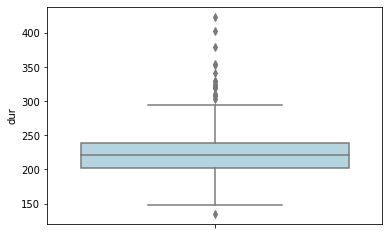

In [8]:
sns.boxplot(y = "dur",data = musics,color = "lightblue")

Boxplot sobre a positividade das músicas


<AxesSubplot:ylabel='val'>

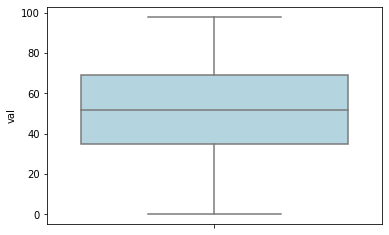

In [9]:
sns.boxplot(y = "val",data = musics,color = "lightblue")


Boxplot do BPM das músicas (Batidas por minuto)

<AxesSubplot:ylabel='bpm'>

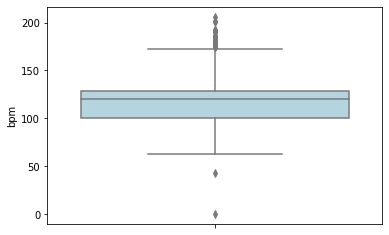

In [10]:
sns.boxplot(y = "bpm", data=musics,color = "lightblue")

Boxplot da energia das músicas

<AxesSubplot:ylabel='nrgy'>

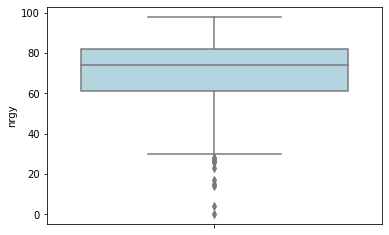

In [11]:
sns.boxplot(y = "nrgy",data = musics,color = "lightblue")

Boxplot da vivacidade das músicas

<AxesSubplot:ylabel='live'>

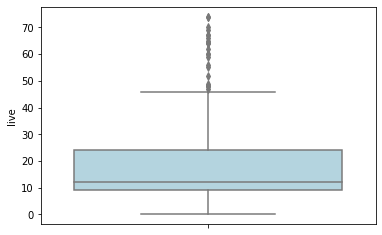

In [12]:
sns.boxplot(y = "live",data = musics,color = "lightblue")

Boxplot da acústica das músicas

<AxesSubplot:ylabel='acous'>

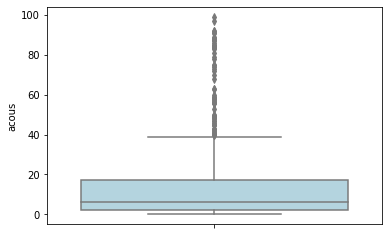

In [13]:
sns.boxplot(y = "acous",data = musics,color = "lightblue")

Boxplot de palavras cantadas das músicas

<AxesSubplot:ylabel='spch'>

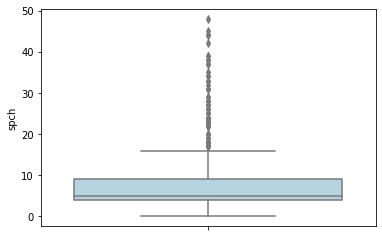

In [14]:
sns.boxplot(y = "spch",data = musics,color = "lightblue")

Boxplot da popularidade das músicas

<AxesSubplot:ylabel='pop'>

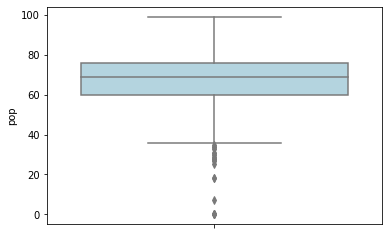

In [15]:
sns.boxplot(y = "pop",data = musics,color = "lightblue")

Boxplot dos decibéis das músicas (são valores negativos)

<AxesSubplot:ylabel='dB'>

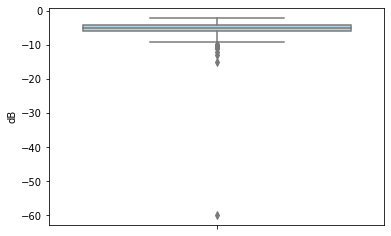

In [16]:
sns.boxplot(y = "dB",data = musics,color = "lightblue")

Boxplot da dançabilidade das músicas

<AxesSubplot:ylabel='dnce'>

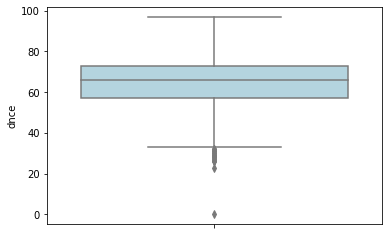

In [17]:
sns.boxplot(y = "dnce",data = musics,color = "lightblue")

## Índices de correlação entre as características musicais

Aqui é possível analisar quais características musicais tem mais/menos correlação entre si.

In [18]:
corr = musics.corr().round(decimals = 4)
corr

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.0000,0.1262,-0.1313,0.1839,0.0816,0.0160,-0.0294,-0.1133,0.0590,0.0190
nrgy,0.1262,1.0000,0.1672,0.5375,0.1867,0.4096,-0.1436,-0.5623,0.1073,-0.0576
dnce,-0.1313,0.1672,1.0000,0.2332,-0.0288,0.5017,-0.1768,-0.2401,-0.0280,0.1161
dB,0.1839,0.5375,0.2332,1.0000,0.0819,0.2829,-0.1047,-0.1904,-0.0011,0.1569
live,0.0816,0.1867,-0.0288,0.0819,1.0000,0.0202,0.0983,-0.0982,0.1441,-0.0757
val,0.0160,0.4096,0.5017,0.2829,0.0202,1.0000,-0.2623,-0.2490,0.1220,0.0390
dur,-0.0294,-0.1436,-0.1768,-0.1047,0.0983,-0.2623,1.0000,0.0918,0.0546,-0.1044
acous,-0.1133,-0.5623,-0.2401,-0.1904,-0.0982,-0.2490,0.0918,1.0000,0.0028,0.0267
spch,0.0590,0.1073,-0.0280,-0.0011,0.1441,0.1220,0.0546,0.0028,1.0000,-0.0415
pop,0.0190,-0.0576,0.1161,0.1569,-0.0757,0.0390,-0.1044,0.0267,-0.0415,1.0000


In [19]:
corr.style.background_gradient(cmap='coolwarm')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.000000,0.126200,-0.131300,0.183900,0.081600,0.016000,-0.029400,-0.113300,0.059000,0.019000
nrgy,0.126200,1.000000,0.167200,0.537500,0.186700,0.409600,-0.143600,-0.562300,0.107300,-0.057600
dnce,-0.131300,0.167200,1.000000,0.233200,-0.028800,0.501700,-0.176800,-0.240100,-0.028000,0.116100
dB,0.183900,0.537500,0.233200,1.000000,0.081900,0.282900,-0.104700,-0.190400,-0.001100,0.156900
live,0.081600,0.186700,-0.028800,0.081900,1.000000,0.020200,0.098300,-0.098200,0.144100,-0.075700
val,0.016000,0.409600,0.501700,0.282900,0.020200,1.000000,-0.262300,-0.249000,0.122000,0.039000
dur,-0.029400,-0.143600,-0.176800,-0.104700,0.098300,-0.262300,1.000000,0.091800,0.054600,-0.104400
acous,-0.113300,-0.562300,-0.240100,-0.190400,-0.098200,-0.249000,0.091800,1.000000,0.002800,0.026700
spch,0.059000,0.107300,-0.028000,-0.001100,0.144100,0.122000,0.054600,0.002800,1.000000,-0.041500
pop,0.019000,-0.057600,0.116100,0.156900,-0.075700,0.039000,-0.104400,0.026700,-0.041500,1.000000


Aqui foi feita a análise dos índices de correlação com a exclusão da diagonal principal, haja vista que ela faz correlação consigo mesma, logo não faria sentido analisar esses dados. No caso, ela foi preenchida com o valor de 0, após isso, foi feito a análise a partir dos novos valores.

In [20]:
np.fill_diagonal(corr.values, 0)
corr

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,0.0000,0.1262,-0.1313,0.1839,0.0816,0.0160,-0.0294,-0.1133,0.0590,0.0190
nrgy,0.1262,0.0000,0.1672,0.5375,0.1867,0.4096,-0.1436,-0.5623,0.1073,-0.0576
dnce,-0.1313,0.1672,0.0000,0.2332,-0.0288,0.5017,-0.1768,-0.2401,-0.0280,0.1161
dB,0.1839,0.5375,0.2332,0.0000,0.0819,0.2829,-0.1047,-0.1904,-0.0011,0.1569
live,0.0816,0.1867,-0.0288,0.0819,0.0000,0.0202,0.0983,-0.0982,0.1441,-0.0757
val,0.0160,0.4096,0.5017,0.2829,0.0202,0.0000,-0.2623,-0.2490,0.1220,0.0390
dur,-0.0294,-0.1436,-0.1768,-0.1047,0.0983,-0.2623,0.0000,0.0918,0.0546,-0.1044
acous,-0.1133,-0.5623,-0.2401,-0.1904,-0.0982,-0.2490,0.0918,0.0000,0.0028,0.0267
spch,0.0590,0.1073,-0.0280,-0.0011,0.1441,0.1220,0.0546,0.0028,0.0000,-0.0415
pop,0.0190,-0.0576,0.1161,0.1569,-0.0757,0.0390,-0.1044,0.0267,-0.0415,0.0000


Abaixo estão os índices de correlação mais/menos fortes após o tratamento.

In [21]:
corr.max()

bpm      0.1839
nrgy     0.5375
dnce     0.5017
dB       0.5375
live     0.1867
val      0.5017
dur      0.0983
acous    0.0918
spch     0.1441
pop      0.1569
dtype: float64

In [22]:
corr.min()

bpm     -0.1313
nrgy    -0.5623
dnce    -0.2401
dB      -0.1904
live    -0.0982
val     -0.2623
dur     -0.2623
acous   -0.5623
spch    -0.0415
pop     -0.1044
dtype: float64

## K_Means

Aqui foi feito a clusterização (agrupamento) dos dados, o critério foi definido por quais músicas tem mais popularidade e a quantia de bpm em comum entre si.

- Antes, foi feita a filtração de algumas colunas do dataframe que não seriam úteis para tal análise:

In [23]:
unecessary = ["top genre", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"]
description = ["top genre", "artist", "title"]
musics.drop(unecessary, axis = "columns", inplace = True)

A dsitribuição desses dados:

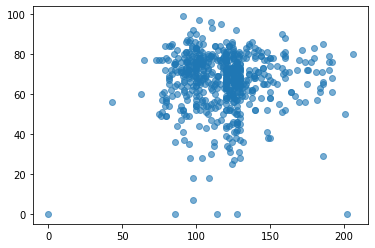

In [24]:
plt.scatter(musics["bpm"], musics["pop"], alpha = 0.6)

Primeiramente foi definido a quantia de "Clusters", ou grupos, desejados para fazer o agrupamento:

In [25]:
km = KMeans(n_clusters = 4)

Abaixo já é exibido uma lista esses grupos separados de acordo com a similaridade entre si:

In [26]:
y_predicted = km.fit_predict(musics[["bpm", "pop"]])
y_predicted

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3,
       0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 3, 1, 3, 2,
       1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1,
       0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 1, 0, 0, 1, 2, 2, 3, 0, 0, 1, 1, 3, 1, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3,
       0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 3, 3, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 1, 3, 0, 1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 3,

Após isso foi inserida uma nova coluna com esses valores no DataFrame:

In [27]:
musics["cluster"] = y_predicted
musics.head()

,title,artist,bpm,pop,cluster
0,"Hey, Soul Sister",Train,97,83,1
1,Love The Way You Lie,Eminem,87,82,1
2,TiK ToK,Kesha,120,80,0
3,Bad Romance,Lady Gaga,119,79,0
4,Just the Way You Are,Bruno Mars,109,78,1


Com os agrupamentos feitos, foi possível fazer um gráfico de dispersão mostrando esse diferentes grupos:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


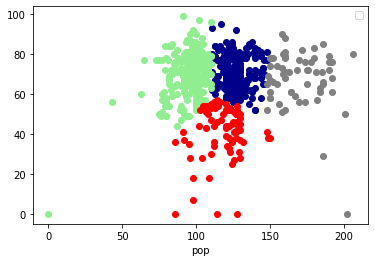

In [28]:
df1 = musics[musics["cluster"] == 0 ]
df2 = musics[musics["cluster"] == 1 ]
df3 = musics[musics["cluster"] == 2 ]
df4 = musics[musics["cluster"] == 3 ]

plt.scatter(df1["bpm"], df1["pop"], color = "darkblue")
plt.scatter(df2["bpm"], df2["pop"], color = "lightgreen")
plt.scatter(df3["bpm"], df3["pop"], color = "red")
plt.scatter(df4["bpm"], df4["pop"], color = "grey")

plt.xlabel("bpm")
plt.xlabel("pop")

plt.legend()

Se atente a duas coisas:
- Os agrupamentos podem não ser os melhores possíveis
- As escalas do eixo x com o eixo y não são proporcionais

Então, foi utilizada a função MinMaxScaler() para tratar esses dados de tal forma que variem de 0 até 1.

In [29]:
scaler = MinMaxScaler()

scaler.fit(musics[["bpm"]])
musics["bpm"] = scaler.transform(musics[["bpm"]])

scaler.fit(musics[["pop"]])
musics["pop"] = scaler.transform(musics[["pop"]])

Após o tratamento, foi feito novamente o gráfico com esses novos valores.

In [30]:
y_predicted = km.fit_predict(musics[["bpm", "pop"]])

In [31]:
musics["cluster"] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


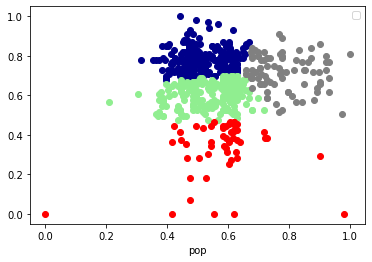

In [32]:
df1 = musics[musics["cluster"] == 0 ]
df2 = musics[musics["cluster"] == 1 ]
df3 = musics[musics["cluster"] == 2 ]
df4 = musics[musics["cluster"] == 3 ]

plt.scatter(df1["bpm"], df1["pop"], color = "darkblue")
plt.scatter(df2["bpm"], df2["pop"], color = "lightgreen")
plt.scatter(df3["bpm"], df3["pop"], color = "red")
plt.scatter(df4["bpm"], df4["pop"], color = "grey")

plt.xlabel("bpm")
plt.xlabel("pop")

plt.legend()

Com o gráfico feito, e com o eixo y proporcional ao eixo x, foi inserido os centróides no gráfico para a melhor visualização.

Abaixo estão as coordenadas dos 4 centróides que serãi inseridos no gráfico:

In [33]:
km.cluster_centers_

array([[0.52804746, 0.77483649],
       [0.55069587, 0.60849878],
       [0.57538011, 0.33600152],
       [0.7778844 , 0.71634954]])

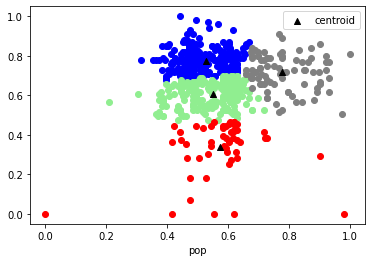

In [34]:
df1 = musics[musics["cluster"] == 0 ]
df2 = musics[musics["cluster"] == 1 ]
df3 = musics[musics["cluster"] == 2 ]
df4 = musics[musics["cluster"] == 3 ]

plt.scatter(df1["bpm"], df1["pop"], color = "blue")
plt.scatter(df2["bpm"], df2["pop"], color = "lightgreen")
plt.scatter(df3["bpm"], df3["pop"], color = "red")
plt.scatter(df4["bpm"], df4["pop"], color = "grey")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "^", label = "centroid")

plt.xlabel("bpm")
plt.xlabel("pop")

plt.legend()

Todavia, após todo este processo, fica a dúvida: "Será que o melhor número de agrupamentos possíveis é realmente 4?"
- Para isso, existe o "Elbow Method", ou método do cotovelo, que define o melhor número para K, em que K representa a quantia de agrupamentos.

Agora para definir o melhor valor para K (Elbow_method):

In [35]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(musics[["pop", "bpm"]])
    sse.append(km.inertia_)

Observe os valores abaixo da lista dos erros médios quadrados, em que há um rápido declinio sobre os três primeiros valores, e em que a partir do quarto valor todos os outros subsequentes seguem um padrão praticamente igual.
- Dessa forma, o valor indicado para K é igual a 3.

In [36]:
sse

[21.66740168615586,
 13.803321368191257,
 9.702993774016697,
 7.700964803983472,
 6.180821214695697,
 5.167756310997977,
 4.34117467280314,
 3.8956464438546625,
 3.52351025967036]

Não somente, o gráfico abaixo, apesar de não ser tão claro nesse caso, demonstra esse comportamento:

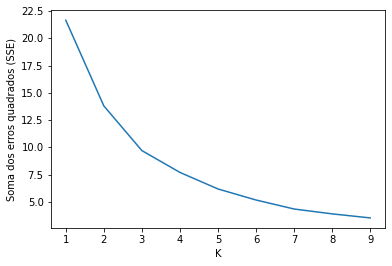

In [37]:
plt.xlabel("K")
plt.ylabel("Soma dos erros quadrados (SSE)")
plt.plot(k_range, sse)

    Logo, o gráfico mais adequado para esse conjunto de dados não é igual ao que foi feito anteriormente, o ideal é feito com o valor de K igual a 3, em que existem três conjuntos de músicas que se assemelham ao se tratar sobre a popularidade relacionada a quantia de bpm (batidas por minuto).

Então, é preciso reajustar alguns dados:

Definiir a quantia de agrupamentos para 3:

In [38]:
km = KMeans(n_clusters = 3)

Dividir o DataFrame em 3 conjuntos:

In [39]:
y_predicted = km.fit_predict(musics[["bpm", "pop"]])

Redesignar esses novos grupos na coluna "cluster" no DataFrame:

In [40]:
musics["cluster"] = y_predicted

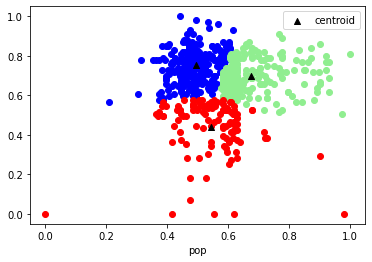

In [41]:
df1 = musics[musics["cluster"] == 0 ]
df2 = musics[musics["cluster"] == 1 ]
df3 = musics[musics["cluster"] == 2 ]

plt.scatter(df1["bpm"], df1["pop"], color = "blue")
plt.scatter(df2["bpm"], df2["pop"], color = "lightgreen")
plt.scatter(df3["bpm"], df3["pop"], color = "red")

plt.xlabel("bpm")
plt.xlabel("pop")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "^", label = "centroid")

plt.legend()

Após o gráfico correto ter sido feito, é preciso checar se tais grupos realmente têm características em comum:

In [42]:
musics = musics.sort_values(by="cluster", ascending=False)
clstr0 = musics[musics["cluster"] == 0]
clstr1 = musics[musics["cluster"] == 1]
clstr2 = musics[musics["cluster"] == 2]

In [43]:
clstr0.describe()

,bpm,pop,cluster
count,251.000000,251.000000,251.0
mean,0.493656,0.751217,0.0
std,0.064514,0.080996,0.0
min,0.208738,0.565657,0.0
25%,0.456311,0.696970,0.0
50%,0.485437,0.757576,0.0
75%,0.543689,0.797980,0.0
max,0.616505,1.000000,0.0


In [44]:
clstr1.describe()

,bpm,pop,cluster
count,240.000000,240.000000,240.0
mean,0.674737,0.697769,1.0
std,0.095295,0.076709,0.0
min,0.577670,0.505051,1.0
25%,0.611650,0.646465,1.0
50%,0.631068,0.696970,1.0
75%,0.718447,0.747475,1.0
max,1.000000,0.909091,1.0


In [45]:
clstr2.describe()

,bpm,pop,cluster
count,112.000000,112.000000,112.0
mean,0.546073,0.438853,2.0
std,0.111057,0.136781,0.0
min,0.000000,0.000000,2.0
25%,0.485437,0.383838,2.0
50%,0.553398,0.479798,2.0
75%,0.611650,0.527778,2.0
max,0.980583,0.575758,2.0
